In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import os
import glob
#import netcdf4 as nc
#import mplniw.utils as ut

In [2]:
root_dir = '/Users/zcasparcohen/Documents/NISKINE/data/'
os.listdir(root_dir+'v1/')

['M1_9408.nc',
 'M2_8065.nc',
 'M2_22479.nc',
 'M2_23615.nc',
 'M1_13481.nc',
 'M3_12733.nc',
 'M1_14408.nc',
 'M3_15694.nc',
 'M1_3109.nc',
 'M3_15339.nc',
 'M2_3110.nc',
 'M1_22476.nc',
 'M3_8122.nc',
 'M2_10219.nc']

### Quick overview of one ADCP

In [3]:
test = xr.open_dataset(root_dir+'v1/M1_9408.nc')
print('Time series begins on ', test.time.values[0])
print('Time series ends on ', test.time.values[-1])

Time series begins on  2019-05-13T00:00:15.000051000
Time series ends on  2020-10-09T20:22:45.999343000


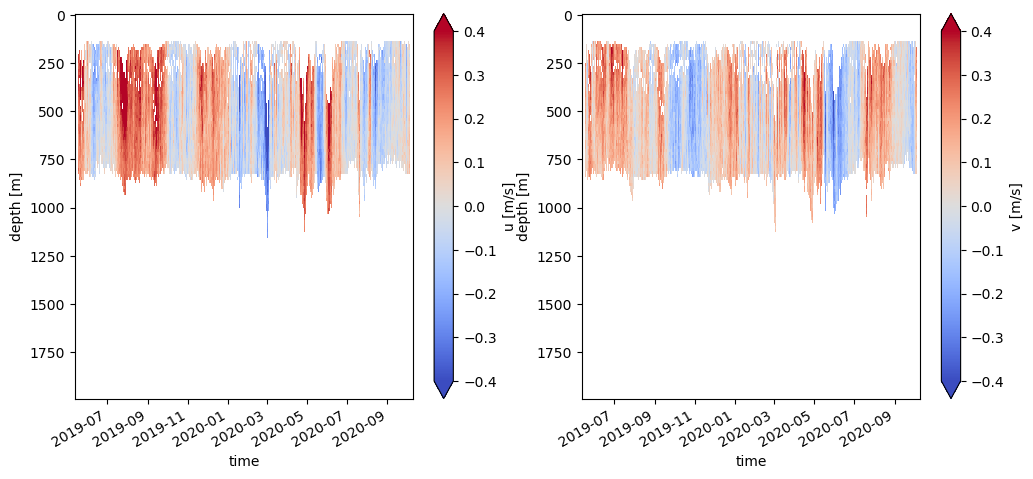

In [4]:
fig,axs=plt.subplots(1,2,figsize=(12,5))
test.u.plot(ax=axs[0],yincrease=False,vmax=0.4,cmap='coolwarm')
test.v.plot(ax=axs[1],yincrease=False,vmax=0.4,cmap='coolwarm')

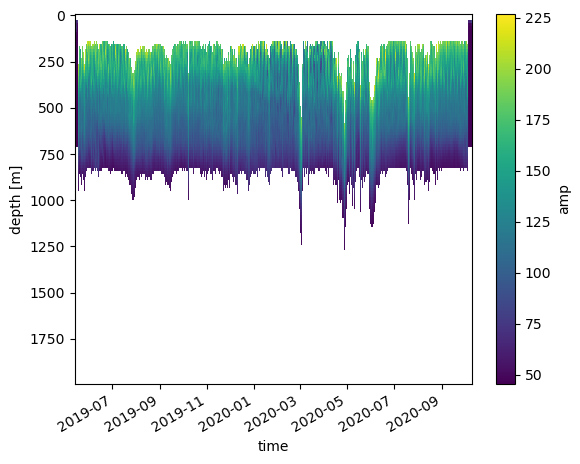

In [5]:
test.amp.plot(yincrease=False)

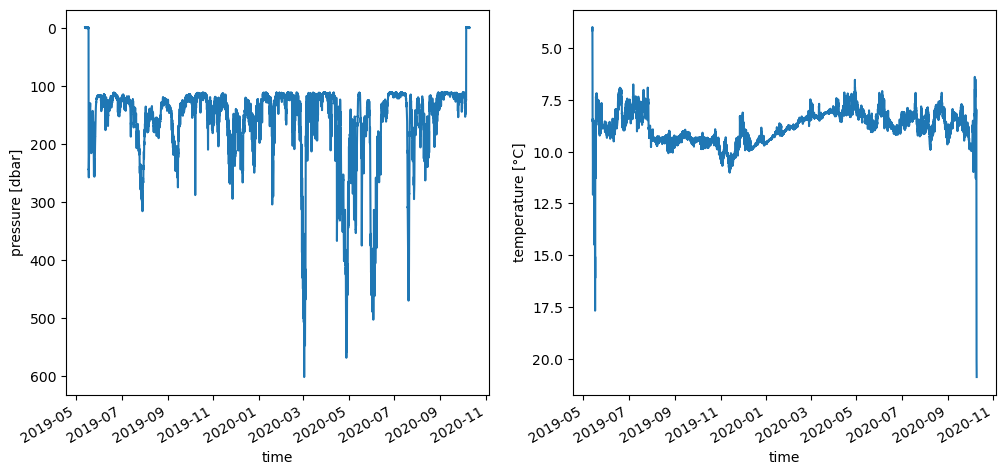

In [6]:
fig,axs=plt.subplots(1,2,figsize=(12,5))
test.pressure.plot(ax=axs[0],yincrease=False)
test.temperature.plot(ax=axs[1],yincrease=False)

### Overview: sorting ADCPs on one mooring 

In [38]:
mooring = 'M1'
listfile = sorted(filter(os.path.isfile,glob.glob(root_dir+'v1/'+mooring+'*')))
arraylist = [xr.open_dataset(file) for file in listfile]

In [39]:
for v in arraylist:
    print('ADCP Number: ', v.sn)
    print(v.dims)
    print('ADCP orientation: ', v.orientation)
    print('---------------------')

ADCP Number:  13481
Frozen({'z': 125, 'time': 23031})
ADCP orientation:  down
---------------------
ADCP Number:  14408
Frozen({'z': 50, 'time': 2218})
ADCP orientation:  up
---------------------
ADCP Number:  22476
Frozen({'z': 50, 'time': 2207})
ADCP orientation:  down
---------------------
ADCP Number:  3109
Frozen({'z': 150, 'time': 89106})
ADCP orientation:  up
---------------------
ADCP Number:  9408
Frozen({'z': 125, 'time': 22857})
ADCP orientation:  down
---------------------


#### Combined data without interpolation (irregular grid)

In [56]:
a, b = arraylist[0], arraylist[-1]

In [76]:
print(b.time.values)
print(a.time.values)
#a.time.plot()

['2019-05-13T00:00:15.000051000' '2019-05-13T00:32:45.006657000'
 '2019-05-13T01:05:15.013264000' ... '2020-10-09T19:17:45.986130000'
 '2020-10-09T19:50:15.992736000' '2020-10-09T20:22:45.999343000']
['2019-05-13T00:00:14.999866000' '2019-05-13T00:32:44.982410000'
 '2019-05-13T01:05:14.964955000' ... '2020-10-13T17:23:32.998375000'
 '2020-10-13T17:56:02.980920000' '2020-10-13T18:28:32.963465000']


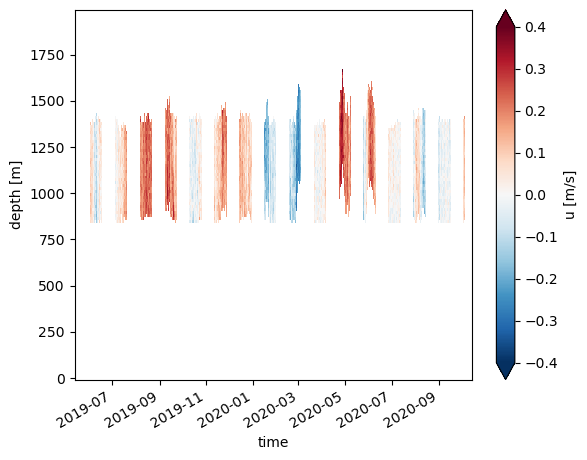

In [81]:
xr.merge([a.u,b.u],compat='override').sortby('z').sortby('time').u.plot(vmax=0.4)

In [20]:
ds_merged = xr.merge(arraylist)

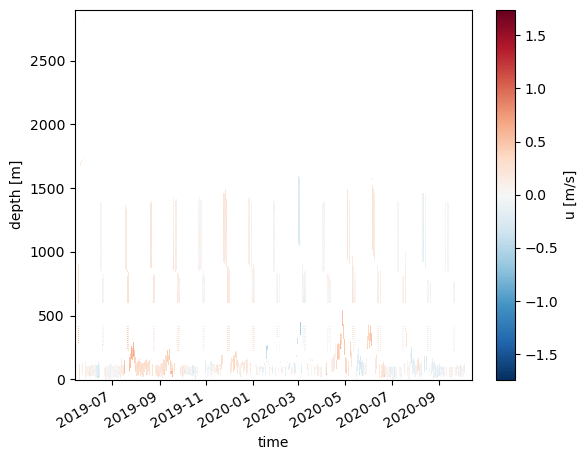

In [25]:
ds_merged.u.plot()

In [ ]:
ds_combined = xr.combine_nested([arraylist],concat_dim=['z','time'],coords='all').sortby('time')

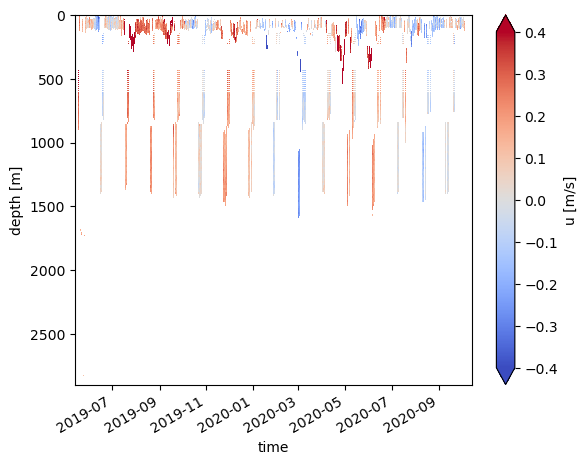

In [12]:
ds_merged.u.plot(yincrease=False,vmax=0.4,cmap='coolwarm')

In [4]:
#test_M1 = xr.concat([xr.open_dataset(root_dir+'data/'+file) for file in M1_files], dim='z',combine_attrs='identical')#.sortby('z')
test_M1 = [xr.open_dataset(root_dir+'data/'+file) for file in M1_files]
M1 = xr.concat([t.assign_coords({'Number':(['id'], [t.sn])}) for t in test_M1],dim='z').sortby('z')

In [6]:
ds_test = xr.concat([t.assign_coords({'id':(['id'], [t.sn])}) for t in test_M1],dim='id')
ds_test

<xarray.Dataset>
Dimensions:       (time: 139419, z: 324, id: 5)
Coordinates:
  * time          (time) datetime64[ns] 2019-05-13T00:00:14.999866 ... 2020-1...
  * z             (z) float64 0.0 4.0 8.0 12.0 ... 2.888e+03 2.892e+03 2.896e+03
  * id            (id) int64 9408 13481 14408 3109 22476
Data variables: (12/15)
    pg            (id, z, time) float32 nan nan 0.0 nan nan ... nan nan nan nan
    u             (id, z, time) float32 nan nan nan nan nan ... nan nan nan nan
    v             (id, z, time) float32 nan nan nan nan nan ... nan nan nan nan
    w             (id, z, time) float32 nan nan nan nan nan ... nan nan nan nan
    e             (id, z, time) float32 nan nan nan nan nan ... nan nan nan nan
    u_std         (id, z, time) float32 nan nan nan nan nan ... nan nan nan nan
    ...            ...
    amp           (id, z, time) float32 nan nan nan nan nan ... nan nan nan nan
    temperature   (id, time) float32 nan nan 4.135 nan nan ... nan nan nan nan
    pressure      (id, time) float32 nan nan -1.317 nan nan ... nan nan nan nan
    pressure_std  (id, time) float32 nan nan 1.69 nan nan ... nan nan nan nan
    pressure_max  (id, time) float32 nan nan 1.042 nan nan ... nan nan nan nan
    npings        (id, time) float32 nan nan 10.0 nan nan ... nan nan nan nan
Attributes:
    orientation:      down
    magdec:           -10.917227
    max_e:            0.2
    max_e_deviation:  2
    min_correlation:  64
    mooring:          M1
    sn:               9408
    project:          NISKINe
    Bin1Dist:         24.25
    NCells:           44
    CellSize:         16.0
    proc time:        2022-05-09T18:57:25

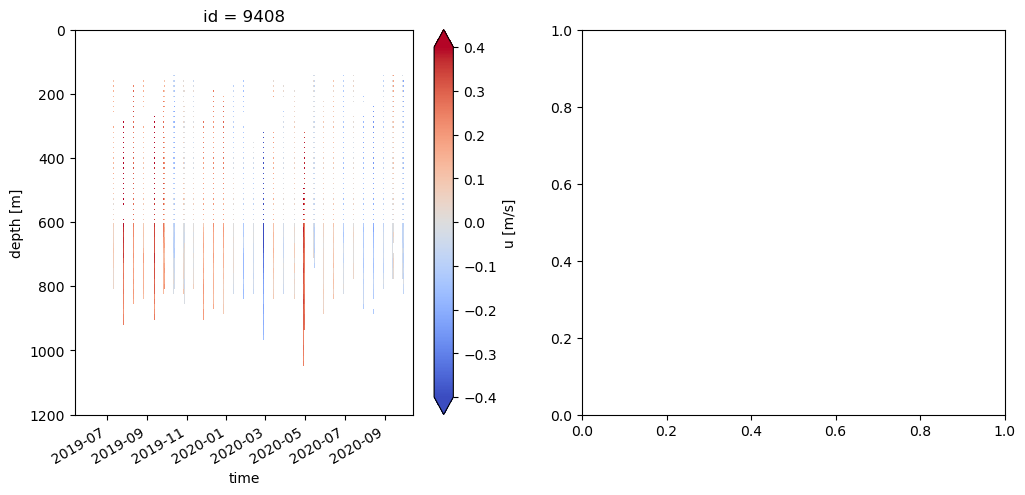

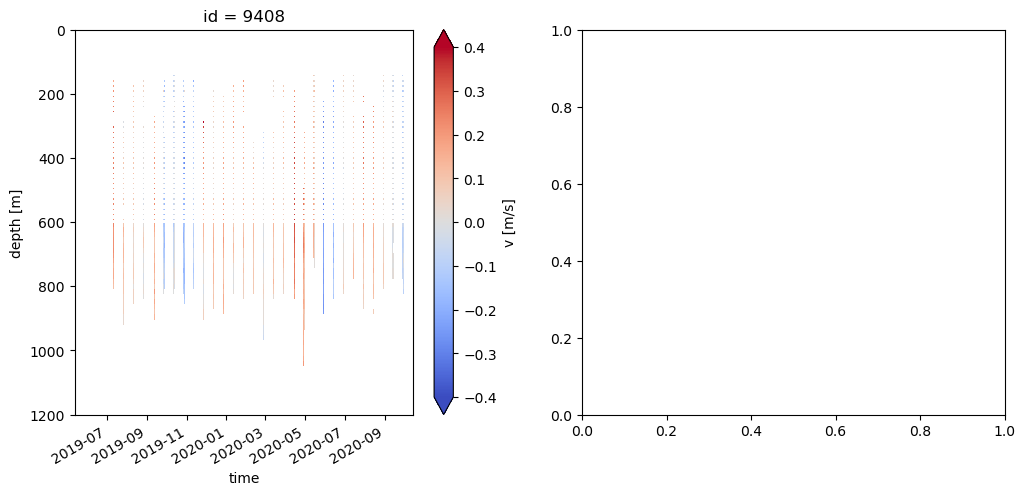

In [7]:
M1_0 = ds_test.sel(id=9408)
for V in M1_0.variables:
    if V in ['u','v']:
        fig,ax = plt.subplots(1,2,figsize=(12,5))
        M1_0[V].plot(ax=ax[0],yincrease=False,ylim=(1200,0),cmap='coolwarm',vmax=0.4)
        #M1_0[V].plot(ax=ax[1],yincrease=False,ylim=(1200,0),cmap='coolwarm',vmax=0.4)
    #test.u.plot(yincrease=False,ylim=(1500,0),cmap='coolwarm')

### Overview:l gridded array

In [28]:
listf = sorted(filter(os.path.isfile,glob.glob(root_dir+'gridded/M1*')))
listf

['/Users/zcasparcohen/Documents/NISKINE/data/gridded/M1_gridded_may2019_simple_merge.nc',
 '/Users/zcasparcohen/Documents/NISKINE/data/gridded/M1_gridded_median_merge.nc',
 '/Users/zcasparcohen/Documents/NISKINE/data/gridded/M1_gridded_median_merge_gaps_filled.nc',
 '/Users/zcasparcohen/Documents/NISKINE/data/gridded/M1_gridded_simple_merge.nc',
 '/Users/zcasparcohen/Documents/NISKINE/data/gridded/M1_gridded_simple_merge_gaps_filled.nc']

In [36]:
ds_gridded = xr.open_dataset(listf[1])
ds_gridded_simple = xr.open_dataset(listf[-2])

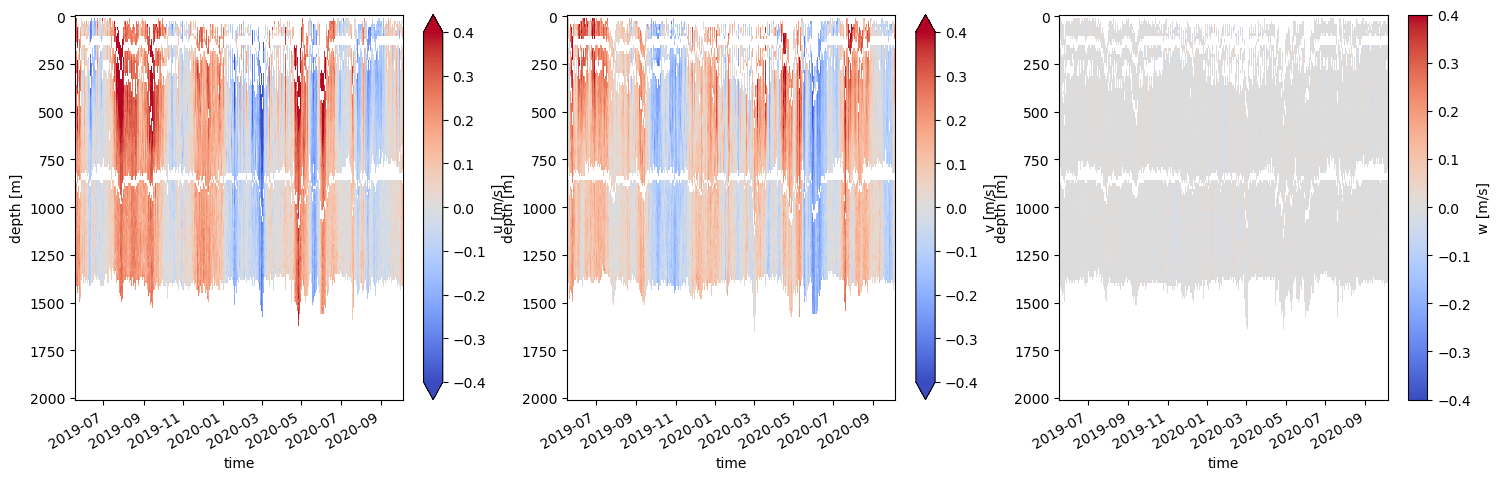

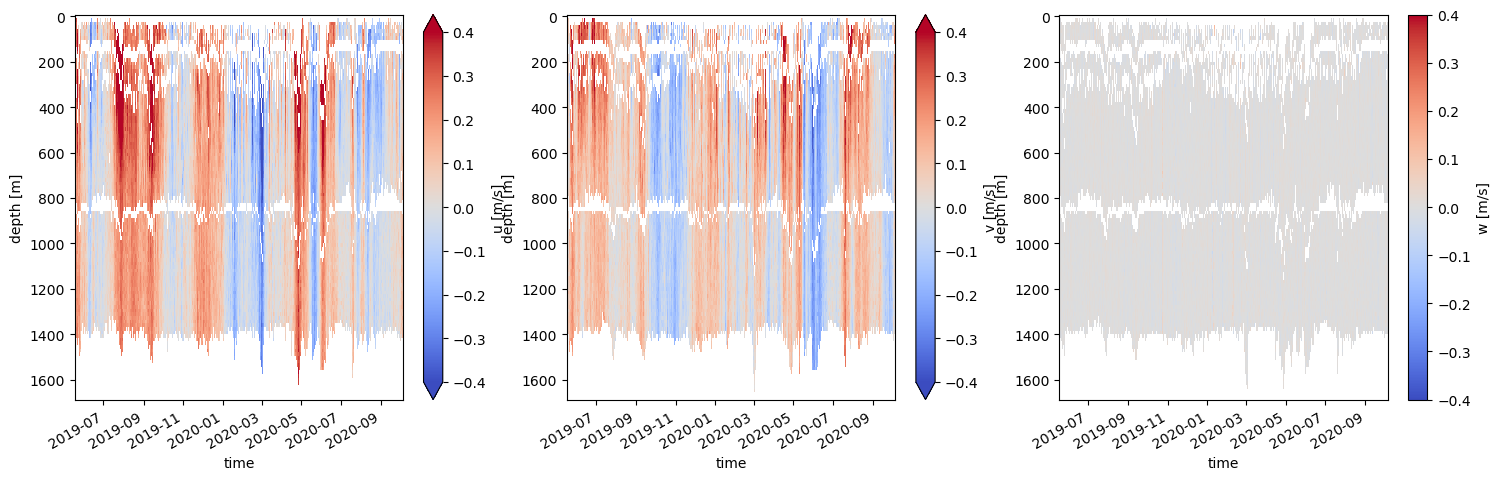

In [37]:
fig,axs=plt.subplots(1,3,figsize=(18,5))
ds_gridded.u.plot(ax=axs[0],yincrease=False,vmax=0.4,cmap='coolwarm')
ds_gridded.v.plot(ax=axs[1],yincrease=False,vmax=0.4,cmap='coolwarm')
ds_gridded.w.plot(ax=axs[2],yincrease=False,vmax=0.4,cmap='coolwarm')

fig,axs=plt.subplots(1,3,figsize=(18,5))
ds_gridded_simple.u.plot(ax=axs[0],yincrease=False,vmax=0.4,cmap='coolwarm')
ds_gridded_simple.v.plot(ax=axs[1],yincrease=False,vmax=0.4,cmap='coolwarm')
ds_gridded_simple.w.plot(ax=axs[2],yincrease=False,vmax=0.4,cmap='coolwarm')